## None not added

### Data Preprocess

In [1]:
import pandas as pd
train_df = pd.read_csv('data/train_annotated.csv')
test_df = pd.read_csv('data/test_annotated.csv')
train_df

,PMCID,PMID,sec-title,sec-norm
0,PMC11191691,38842535,"['Introduction', 'Results and Discussion', 'Co...","['background', 'conclusions', 'conclusions', '..."
1,PMC11182025,38887617,"['Introduction', 'Materials & Methods', 'Resul...","['background', 'methods', 'results', 'conclusi..."
2,PMC10511328,37704722,"['Main', 'Pooled longitudinal analyses', 'Popu...","['background', 'results', 'results', 'results'..."
3,PMC10632145,37914938,"['Main', 'Population imaging and single-cell a...","['background', 'results', 'results', 'results'..."
4,PMC1084334,15884974,"['Introduction', 'Results', 'Discussion', 'Mat...","['background', 'results', 'conclusions', 'meth..."
...,...,...,...,...
635,PMC11187391,38123960,['Ethics statements'],[nan]
636,PMC11187998,38903349,"['Introduction', 'Case presentation', 'Discuss...","['background', 'methods', 'conclusions', 'conc..."
637,PMC11191920,38905421,"['1. Introduction', '2. Patients and methods',...","['background', 'methods', 'results', 'conclusi..."
638,PMC10978839,38548747,"['Introduction', 'Results', 'Discussion', 'Mat...","['background', 'results', 'conclusions', 'meth..."


In [2]:
test_df

,PMCID,PMID,sec-title,sec-norm
0,PMC11184573,38888203,"['INTRODUCTION', 'MATERIALS AND METHODS', 'DIS...","['background', 'methods', 'conclusions', 'conc..."
1,PMC11183239,38886373,"['Introduction', 'Subjects and methods', 'Resu...","['background', 'methods', 'results', 'conclusi..."
2,PMC11187291,38903966,"['Introduction', 'Methods', 'Results', 'Discus...","['background', 'methods', 'results', 'conclusi..."
3,PMC11177991,38883749,"['INTRODUCTION', 'MATERIALS AND METHODS', 'RES...","['background', 'methods', 'results', 'conclusi..."
4,PMC11187304,38903638,"['Introduction', 'Methods', 'Case reports', 'D...","['background', 'methods', 'methods', 'conclusi..."
...,...,...,...,...
155,PMC11181322,38771959,"['Introduction', 'Results and Discussion', 'Co...","['background', 'conclusions', 'conclusions', '..."
156,PMC11186409,38899065,"['Introduction', 'Materials and methods', 'Res...","['background', 'methods', 'results', 'conclusi..."
157,PMC11185683,38895272,"['Introduction', 'Results', 'Discussion', 'Mat...","['background', 'results', 'conclusions', 'meth..."
158,PMC11161898,38854388,"['METHODS', 'RESULTS', 'DISCUSSION', 'Notes']","['methods', 'results', 'conclusions', 'backgro..."


In [3]:
import ast
import numpy as np

# import numpy as np

def eval_with_nan(x):
    if isinstance(x, list):
        return [np.nan if (isinstance(i, float) and np.isnan(i)) else i for i in x]
    try:
        # 這邊直接 eval 而且給定 locals
        val = eval(x, {"nan": np.nan, "NaN": np.nan, "np": np})
        if isinstance(val, list):
            return [np.nan if (isinstance(i, float) and np.isnan(i)) else i for i in val]
        else:
            return val
    except Exception:
        return x  # 如果 eval 還失敗就原樣保留

# 用在你的 dataframe 上
# df_j['sec-norm'] = df_j['sec-norm'].apply(eval_with_nan)




In [4]:

train_df['sec-title'] = train_df['sec-title'].apply(ast.literal_eval)
test_df['sec-title'] = test_df['sec-title'].apply(ast.literal_eval)
train_df['sec-norm'] = train_df['sec-norm'].apply(eval_with_nan)
test_df['sec-norm'] = test_df['sec-norm'].apply(eval_with_nan)

In [5]:
train_df

,PMCID,PMID,sec-title,sec-norm
0,PMC11191691,38842535,"[Introduction, Results and Discussion, Conclus...","[background, conclusions, conclusions, backgro..."
1,PMC11182025,38887617,"[Introduction, Materials & Methods, Results, D...","[background, methods, results, conclusions, co..."
2,PMC10511328,37704722,"[Main, Pooled longitudinal analyses, Populatio...","[background, results, results, results, result..."
3,PMC10632145,37914938,"[Main, Population imaging and single-cell acti...","[background, results, results, results, result..."
4,PMC1084334,15884974,"[Introduction, Results, Discussion, Materials ...","[background, results, conclusions, methods, ba..."
...,...,...,...,...
635,PMC11187391,38123960,[Ethics statements],[nan]
636,PMC11187998,38903349,"[Introduction, Case presentation, Discussion, ...","[background, methods, conclusions, conclusions]"
637,PMC11191920,38905421,"[1. Introduction, 2. Patients and methods, 3. ...","[background, methods, results, conclusions, ba..."
638,PMC10978839,38548747,"[Introduction, Results, Discussion, Materials ...","[background, results, conclusions, methods, ba..."


In [6]:
test_df

,PMCID,PMID,sec-title,sec-norm
0,PMC11184573,38888203,"[INTRODUCTION, MATERIALS AND METHODS, DISCUSSI...","[background, methods, conclusions, conclusions..."
1,PMC11183239,38886373,"[Introduction, Subjects and methods, Results, ...","[background, methods, results, conclusions, co..."
2,PMC11187291,38903966,"[Introduction, Methods, Results, Discussion, C...","[background, methods, results, conclusions, co..."
3,PMC11177991,38883749,"[INTRODUCTION, MATERIALS AND METHODS, RESULTS,...","[background, methods, results, conclusions, co..."
4,PMC11187304,38903638,"[Introduction, Methods, Case reports, Discussi...","[background, methods, methods, conclusions, co..."
...,...,...,...,...
155,PMC11181322,38771959,"[Introduction, Results and Discussion, Conclus...","[background, conclusions, conclusions, methods..."
156,PMC11186409,38899065,"[Introduction, Materials and methods, Results,...","[background, methods, results, conclusions, ba..."
157,PMC11185683,38895272,"[Introduction, Results, Discussion, Materials ...","[background, results, conclusions, methods]"
158,PMC11161898,38854388,"[METHODS, RESULTS, DISCUSSION, Notes]","[methods, results, conclusions, background]"


In [7]:
import pandas as pd

def convert_to_sep_format(row):
    titles = row["sec-title"]  # 取得標題列表
    labels = row["sec-norm"]   # 取得標籤列表

    inputs_with_sep = []
    labels_with_sep = []

    for i, title in enumerate(titles):
        inputs_with_sep.append(title)
        labels_with_sep.append("O")  # 一般 token 標記為 "O"
        
        # 在每個標題後面插入 [SEP]，對應標籤來自 sec-norm
        if i < len(labels):  # 確保標籤數量正確
            inputs_with_sep.append("[SEP]")
            if pd.isna(labels[i]):
                labels_with_sep.append('-100') ## none labeled
            else:
                labels_with_sep.append(labels[i])  # 讓 [SEP] 位置承擔標籤

    return pd.Series([inputs_with_sep, labels_with_sep])


# 對 DataFrame 進行轉換
train_df[["inputs_with_sep", "labels_with_sep"]] = train_df.apply(convert_to_sep_format, axis=1)
train_df = train_df[
    train_df['labels_with_sep'].apply(len) - train_df['labels_with_sep'].apply(lambda x: x.count('O')) > 0
]

test_df[["inputs_with_sep", "labels_with_sep"]] = test_df.apply(convert_to_sep_format, axis=1)
test_df = test_df[
    test_df['labels_with_sep'].apply(len) - test_df['labels_with_sep'].apply(lambda x: x.count('O')) > 0
]

In [8]:
train_df = train_df.drop(columns=['sec-title', 'sec-norm'])
train_df

,PMCID,PMID,inputs_with_sep,labels_with_sep
0,PMC11191691,38842535,"[Introduction, [SEP], Results and Discussion, ...","[O, background, O, conclusions, O, conclusions..."
1,PMC11182025,38887617,"[Introduction, [SEP], Materials & Methods, [SE...","[O, background, O, methods, O, results, O, con..."
2,PMC10511328,37704722,"[Main, [SEP], Pooled longitudinal analyses, [S...","[O, background, O, results, O, results, O, res..."
3,PMC10632145,37914938,"[Main, [SEP], Population imaging and single-ce...","[O, background, O, results, O, results, O, res..."
4,PMC1084334,15884974,"[Introduction, [SEP], Results, [SEP], Discussi...","[O, background, O, results, O, conclusions, O,..."
...,...,...,...,...
635,PMC11187391,38123960,"[Ethics statements, [SEP]]","[O, -100]"
636,PMC11187998,38903349,"[Introduction, [SEP], Case presentation, [SEP]...","[O, background, O, methods, O, conclusions, O,..."
637,PMC11191920,38905421,"[1. Introduction, [SEP], 2. Patients and metho...","[O, background, O, methods, O, results, O, con..."
638,PMC10978839,38548747,"[Introduction, [SEP], Results, [SEP], Discussi...","[O, background, O, results, O, conclusions, O,..."


In [9]:
from sklearn.model_selection import train_test_split

# 將 train_df 拆成 87.5% 訓練資料 和 12.5% 驗證資料
train_df, val_df = train_test_split(train_df, test_size=1/8, random_state=42, shuffle=True)

train_df

,PMCID,PMID,inputs_with_sep,labels_with_sep
304,PMC11189173,38900748,"[Introduction, [SEP], Methods, [SEP], Result, ...","[O, background, O, methods, O, results, O, con..."
414,PMC11180756,38887229,"[Introduction, [SEP], Materials and methods, [...","[O, background, O, methods, O, results, O, con..."
577,PMC11073751,38716403,"[Background, [SEP], Methods, [SEP], Results, [...","[O, background, O, methods, O, results, O, con..."
259,PMC10962890,38131617,"[INTRODUCTION, [SEP], METHODS, [SEP], RESULTS,...","[O, background, O, methods, O, results, O, con..."
594,PMC11152445,38896724,"[INTRODUCTION, [SEP], OUTCOMES AFTER INTENSIVE...","[O, background, O, -100, O, -100, O, -100, O, ..."
...,...,...,...,...
71,PMC11192717,38906906,"[Introduction, [SEP], Results, [SEP], Discussi...","[O, background, O, results, O, conclusions, O,..."
106,PMC11192365,38857285,"[Introduction, [SEP], Results, [SEP], Discussi...","[O, background, O, results, O, conclusions, O,..."
270,PMC11186357,38904030,"[Introduction, [SEP], Materials and Methods, [...","[O, background, O, methods, O, results, O, con..."
435,PMC11189877,38900377,"[Background, [SEP], Case presentation, [SEP], ...","[O, background, O, methods, O, conclusions, O,..."


In [10]:
val_df

,PMCID,PMID,inputs_with_sep,labels_with_sep
570,PMC11186153,38898433,"[Introduction, [SEP], Materials and methods, [...","[O, background, O, methods, O, results, O, con..."
265,PMC11184630,38894760,"[Introduction, [SEP], Case presentation, [SEP]...","[O, background, O, methods, O, conclusions, O,..."
291,PMC1065320,15743470,"[Introduction, [SEP], Materials and methods, [...","[O, background, O, methods, O, results, O, con..."
597,PMC11180906,38887537,"[Introduction, [SEP], Materials and methods, [...","[O, background, O, methods, O, results, O, con..."
174,PMC11184868,38886767,"[Background, [SEP], Stem-cell derived ECs, [SE...","[O, background, O, -100, O, -100, O, -100, O, ..."
...,...,...,...,...
527,PMC11190884,38842026,"[Introduction, [SEP], Nucleic Acid, [SEP], Bio...","[O, background, O, results, O, results, O, res..."
86,PMC11188041,36347335,"[Introduction, [SEP], Materials and methods, [...","[O, background, O, methods, O, results, O, con..."
369,PMC11186168,38890641,"[Introduction, [SEP], Methods, [SEP], Results,...","[O, background, O, methods, O, results, O, con..."
636,PMC11187998,38903349,"[Introduction, [SEP], Case presentation, [SEP]...","[O, background, O, methods, O, conclusions, O,..."


### model

In [11]:
from torch.utils.data import DataLoader
from transformers import BertTokenizerFast

from transformers import AutoTokenizer, AutoModel



tokenizer = AutoTokenizer.from_pretrained("microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract-fulltext")

MAX_LENGTH = 20  # 你希望的最大序列長度

def collate_fn(batch):
    input_ids, attention_masks, labels, word_lists, word_id_lists = zip(*batch)
    return (
        torch.stack(input_ids),
        torch.stack(attention_masks),
        torch.stack(labels),
        list(word_lists),
        list(word_id_lists)  # list of lists，不要 stack
    )



In [12]:
import torch
from transformers import BertTokenizer
from torch.utils.data import Dataset, DataLoader
from collections import defaultdict

# 載入 BERT Tokenizer
# tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# 建立標籤映射表

label2id = {"O": 0, "objective": 1, "background": 2, "methods": 3, "results": 4, "conclusions": 5}
# label2id = defaultdict(int, label2id)
id2label = {v: k for k, v in label2id.items()}

class SectionDataset(Dataset):
    def __init__(self, df, tokenizer, max_length=MAX_LENGTH):
        self.df = df
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        inputs_with_sep = ['[CLS]'] + row["inputs_with_sep"]  # 原始詞列表
        label_with_sep = [0] + row["labels_with_sep"]

        # Tokenize
        encoded = self.tokenizer(
            inputs_with_sep,
            is_split_into_words=True,
            padding="max_length",
            truncation=True,
            max_length=self.max_length,
            return_tensors="pt"
        )

        input_ids = encoded["input_ids"].squeeze(0)
        attention_mask = encoded["attention_mask"].squeeze(0)

        # 根據 word_ids 展開 label 給每個 token
        word_ids = encoded.word_ids(batch_index=0)
        labels_per_token = []

        for word_idx in word_ids:
            if word_idx is None:
                labels_per_token.append(0)  # special tokens
            else:
                label_name = label_with_sep[word_idx]
                label_id = label2id.get(label_name, 0)  # fallback 用 "O"
                labels_per_token.append(label_id)

        labels = torch.tensor(labels_per_token, dtype=torch.long)

        return input_ids, attention_mask, labels, inputs_with_sep, word_ids


from sklearn.model_selection import train_test_split

train_dataset = SectionDataset(train_df, tokenizer)
val_dataset = SectionDataset(val_df, tokenizer)
test_dataset = SectionDataset(test_df, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=10, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=True, collate_fn=collate_fn)



In [13]:
sample = train_dataset[0]
print(sample)

(tensor([   2,    2, 6935,    3, 2860,    3, 3211,    3, 7248,    3, 6184, 2988,
           3,    3,    0,    0,    0,    0,    0,    0]), tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]), tensor([0, 0, 0, 2, 0, 3, 0, 4, 0, 5, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]), ['[CLS]', 'Introduction', '[SEP]', 'Methods', '[SEP]', 'Result', '[SEP]', 'Discussion', '[SEP]', 'Supporting information', '[SEP]'], [None, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 10, None, None, None, None, None, None, None])


In [14]:
# !pip uninstall TorchCRF
# !pip install transformers==4.30.2


In [15]:
import torch.nn as nn
from transformers import BertModel
from torchcrf import CRF

class BERT_CRF(nn.Module):
    def __init__(self, num_labels):
        super(BERT_CRF, self).__init__()
        self.bert = AutoModel.from_pretrained("microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract-fulltext")
        self.hidden_dim = self.bert.config.hidden_size
        self.fc = nn.Linear(self.hidden_dim, num_labels)  # 轉換為標籤 logits
        self.crf = CRF(num_labels, batch_first=True)  # CRF 層

    def forward(self, input_ids, attention_mask, labels=None):
        outputs = self.bert(input_ids, attention_mask=attention_mask)
        sequence_output = outputs.last_hidden_state  # (batch_size, seq_len, hidden_dim)
        emissions = self.fc(sequence_output)  # (batch_size, seq_len, num_labels)

        if labels is not None:
            loss = -self.crf(emissions, labels, mask=attention_mask.byte(), reduction="mean")
            return loss
        else:
            predictions = self.crf.decode(emissions, mask=attention_mask.byte())
            return predictions


Epoch 1:   0%|          | 0/56 [00:00<?, ?it/s]/jet/home/slin23/.local/lib/python3.12/site-packages/torchcrf/__init__.py:249: UserWarning: where received a uint8 condition tensor. This behavior is deprecated and will be removed in a future version of PyTorch. Use a boolean condition instead. (Triggered internally at /pytorch/aten/src/ATen/native/TensorCompare.cpp:529.)
  score = torch.where(mask[i].unsqueeze(1), next_score, score)
Epoch 1: 100%|██████████| 56/56 [00:03<00:00, 16.19it/s]


Epoch 1/100 | Train Loss: 632.4920 | Val Loss: 72.4447


Epoch 2: 100%|██████████| 56/56 [00:02<00:00, 20.09it/s]


Epoch 2/100 | Train Loss: 440.2149 | Val Loss: 63.7904


Epoch 3: 100%|██████████| 56/56 [00:02<00:00, 20.11it/s]


Epoch 3/100 | Train Loss: 432.8525 | Val Loss: 50.9620


Epoch 4: 100%|██████████| 56/56 [00:02<00:00, 20.31it/s]


Epoch 4/100 | Train Loss: 335.6571 | Val Loss: 42.5481


Epoch 5: 100%|██████████| 56/56 [00:02<00:00, 20.08it/s]


Epoch 5/100 | Train Loss: 224.8407 | Val Loss: 26.2626


Epoch 6: 100%|██████████| 56/56 [00:02<00:00, 20.14it/s]


Epoch 6/100 | Train Loss: 203.0043 | Val Loss: 27.6378


Epoch 7: 100%|██████████| 56/56 [00:02<00:00, 19.99it/s]


Epoch 7/100 | Train Loss: 260.1519 | Val Loss: 28.1864


Epoch 8: 100%|██████████| 56/56 [00:02<00:00, 20.25it/s]


Epoch 8/100 | Train Loss: 163.7312 | Val Loss: 24.0276


Epoch 9: 100%|██████████| 56/56 [00:02<00:00, 20.04it/s]


Epoch 9/100 | Train Loss: 151.1770 | Val Loss: 23.4684


Epoch 10: 100%|██████████| 56/56 [00:02<00:00, 20.20it/s]


Epoch 10/100 | Train Loss: 117.7236 | Val Loss: 11.2823


Epoch 11: 100%|██████████| 56/56 [00:02<00:00, 20.19it/s]


Epoch 11/100 | Train Loss: 77.6244 | Val Loss: 13.4121


Epoch 12: 100%|██████████| 56/56 [00:02<00:00, 20.25it/s]


Epoch 12/100 | Train Loss: 56.8583 | Val Loss: 8.5937


Epoch 13: 100%|██████████| 56/56 [00:02<00:00, 20.32it/s]


Epoch 13/100 | Train Loss: 29.4678 | Val Loss: 7.8402


Epoch 14: 100%|██████████| 56/56 [00:02<00:00, 20.14it/s]


Epoch 14/100 | Train Loss: 23.6868 | Val Loss: 8.1313


Epoch 15: 100%|██████████| 56/56 [00:02<00:00, 20.08it/s]


Epoch 15/100 | Train Loss: 18.7526 | Val Loss: 8.7371


Epoch 16: 100%|██████████| 56/56 [00:02<00:00, 20.14it/s]


Epoch 16/100 | Train Loss: 17.3439 | Val Loss: 8.1305


Epoch 17: 100%|██████████| 56/56 [00:02<00:00, 20.06it/s]


Epoch 17/100 | Train Loss: 36.3377 | Val Loss: 8.4581


Epoch 18: 100%|██████████| 56/56 [00:02<00:00, 20.18it/s]


Epoch 18/100 | Train Loss: 19.6985 | Val Loss: 10.8375


Epoch 19: 100%|██████████| 56/56 [00:02<00:00, 20.20it/s]


Epoch 19/100 | Train Loss: 16.5100 | Val Loss: 7.9577


Epoch 20: 100%|██████████| 56/56 [00:02<00:00, 20.33it/s]


Epoch 20/100 | Train Loss: 12.3570 | Val Loss: 9.2278


Epoch 21: 100%|██████████| 56/56 [00:02<00:00, 20.23it/s]


Epoch 21/100 | Train Loss: 11.9517 | Val Loss: 9.3681


Epoch 22: 100%|██████████| 56/56 [00:02<00:00, 20.26it/s]


Epoch 22/100 | Train Loss: 8.4249 | Val Loss: 8.8836


Epoch 23: 100%|██████████| 56/56 [00:02<00:00, 20.12it/s]


Epoch 23/100 | Train Loss: 10.5208 | Val Loss: 7.3981


Epoch 24: 100%|██████████| 56/56 [00:02<00:00, 20.21it/s]


Epoch 24/100 | Train Loss: 9.3793 | Val Loss: 6.6072


Epoch 25: 100%|██████████| 56/56 [00:02<00:00, 20.16it/s]


Epoch 25/100 | Train Loss: 5.1119 | Val Loss: 7.6915


Epoch 26: 100%|██████████| 56/56 [00:02<00:00, 20.13it/s]


Epoch 26/100 | Train Loss: 6.3405 | Val Loss: 6.6203


Epoch 27: 100%|██████████| 56/56 [00:02<00:00, 20.14it/s]


Epoch 27/100 | Train Loss: 9.5834 | Val Loss: 7.3431


Epoch 28: 100%|██████████| 56/56 [00:02<00:00, 19.98it/s]


Epoch 28/100 | Train Loss: 6.8764 | Val Loss: 9.9966


Epoch 29: 100%|██████████| 56/56 [00:02<00:00, 20.24it/s]


Epoch 29/100 | Train Loss: 9.2462 | Val Loss: 10.5164


Epoch 30: 100%|██████████| 56/56 [00:02<00:00, 20.19it/s]


Epoch 30/100 | Train Loss: 11.3332 | Val Loss: 9.2755


Epoch 31: 100%|██████████| 56/56 [00:02<00:00, 20.23it/s]


Epoch 31/100 | Train Loss: 6.0270 | Val Loss: 7.3531


Epoch 32: 100%|██████████| 56/56 [00:02<00:00, 20.22it/s]


Epoch 32/100 | Train Loss: 8.7544 | Val Loss: 10.3852


Epoch 33: 100%|██████████| 56/56 [00:02<00:00, 20.31it/s]


Epoch 33/100 | Train Loss: 6.7612 | Val Loss: 7.6847


Epoch 34: 100%|██████████| 56/56 [00:02<00:00, 20.31it/s]


Epoch 34/100 | Train Loss: 5.2605 | Val Loss: 9.7915


Epoch 35: 100%|██████████| 56/56 [00:02<00:00, 20.26it/s]


Epoch 35/100 | Train Loss: 4.7765 | Val Loss: 7.9213


Epoch 36: 100%|██████████| 56/56 [00:02<00:00, 20.33it/s]


Epoch 36/100 | Train Loss: 3.6007 | Val Loss: 7.2012


Epoch 37: 100%|██████████| 56/56 [00:02<00:00, 20.22it/s]


Epoch 37/100 | Train Loss: 3.1106 | Val Loss: 9.5624


Epoch 38: 100%|██████████| 56/56 [00:02<00:00, 20.25it/s]


Epoch 38/100 | Train Loss: 2.5042 | Val Loss: 8.2785


Epoch 39: 100%|██████████| 56/56 [00:02<00:00, 20.43it/s]


Epoch 39/100 | Train Loss: 3.8850 | Val Loss: 10.0732


Epoch 40: 100%|██████████| 56/56 [00:02<00:00, 20.15it/s]


Epoch 40/100 | Train Loss: 4.4536 | Val Loss: 8.2148


Epoch 41: 100%|██████████| 56/56 [00:02<00:00, 20.23it/s]


Epoch 41/100 | Train Loss: 2.6284 | Val Loss: 8.1697


Epoch 42: 100%|██████████| 56/56 [00:02<00:00, 20.16it/s]


Epoch 42/100 | Train Loss: 7.3318 | Val Loss: 8.9407


Epoch 43: 100%|██████████| 56/56 [00:02<00:00, 20.34it/s]


Epoch 43/100 | Train Loss: 3.9045 | Val Loss: 10.1796


Epoch 44: 100%|██████████| 56/56 [00:02<00:00, 20.52it/s]


Epoch 44/100 | Train Loss: 2.7078 | Val Loss: 11.4003


Epoch 45: 100%|██████████| 56/56 [00:02<00:00, 20.16it/s]


Epoch 45/100 | Train Loss: 9.9218 | Val Loss: 11.3383


Epoch 46: 100%|██████████| 56/56 [00:02<00:00, 20.29it/s]


Epoch 46/100 | Train Loss: 7.6213 | Val Loss: 10.1214


Epoch 47: 100%|██████████| 56/56 [00:02<00:00, 20.23it/s]


Epoch 47/100 | Train Loss: 9.3518 | Val Loss: 11.6238


Epoch 48: 100%|██████████| 56/56 [00:02<00:00, 20.15it/s]


Epoch 48/100 | Train Loss: 15.2100 | Val Loss: 7.8260


Epoch 49: 100%|██████████| 56/56 [00:02<00:00, 20.29it/s]


Epoch 49/100 | Train Loss: 9.3532 | Val Loss: 8.1688


Epoch 50: 100%|██████████| 56/56 [00:02<00:00, 20.26it/s]


Epoch 50/100 | Train Loss: 5.1073 | Val Loss: 7.4790


Epoch 51: 100%|██████████| 56/56 [00:02<00:00, 20.16it/s]


Epoch 51/100 | Train Loss: 2.7017 | Val Loss: 9.4925


Epoch 52: 100%|██████████| 56/56 [00:02<00:00, 20.39it/s]


Epoch 52/100 | Train Loss: 3.3324 | Val Loss: 10.2324


Epoch 53: 100%|██████████| 56/56 [00:02<00:00, 20.33it/s]


Epoch 53/100 | Train Loss: 2.4102 | Val Loss: 8.7472


Epoch 54: 100%|██████████| 56/56 [00:02<00:00, 20.18it/s]


Epoch 54/100 | Train Loss: 3.4311 | Val Loss: 8.7994


Epoch 55: 100%|██████████| 56/56 [00:02<00:00, 20.33it/s]


Epoch 55/100 | Train Loss: 5.6330 | Val Loss: 9.1026


Epoch 56: 100%|██████████| 56/56 [00:02<00:00, 20.20it/s]


Epoch 56/100 | Train Loss: 4.3930 | Val Loss: 10.6470


Epoch 57: 100%|██████████| 56/56 [00:02<00:00, 20.18it/s]


Epoch 57/100 | Train Loss: 2.5120 | Val Loss: 8.3566


Epoch 58: 100%|██████████| 56/56 [00:02<00:00, 20.26it/s]


Epoch 58/100 | Train Loss: 1.5344 | Val Loss: 8.9833


Epoch 59: 100%|██████████| 56/56 [00:02<00:00, 20.16it/s]


Epoch 59/100 | Train Loss: 1.4176 | Val Loss: 8.5577


Epoch 60: 100%|██████████| 56/56 [00:02<00:00, 20.16it/s]


Epoch 60/100 | Train Loss: 1.5782 | Val Loss: 9.0830


Epoch 61: 100%|██████████| 56/56 [00:02<00:00, 20.14it/s]


Epoch 61/100 | Train Loss: 1.3875 | Val Loss: 8.1221


Epoch 62: 100%|██████████| 56/56 [00:02<00:00, 20.11it/s]


Epoch 62/100 | Train Loss: 1.6678 | Val Loss: 8.6751


Epoch 63: 100%|██████████| 56/56 [00:02<00:00, 20.26it/s]


Epoch 63/100 | Train Loss: 1.9104 | Val Loss: 9.5023


Epoch 64: 100%|██████████| 56/56 [00:02<00:00, 20.19it/s]


Epoch 64/100 | Train Loss: 1.7381 | Val Loss: 11.2326


Epoch 65: 100%|██████████| 56/56 [00:02<00:00, 20.19it/s]


Epoch 65/100 | Train Loss: 1.4370 | Val Loss: 10.7811


Epoch 66: 100%|██████████| 56/56 [00:02<00:00, 20.33it/s]


Epoch 66/100 | Train Loss: 1.2955 | Val Loss: 9.6817


Epoch 67: 100%|██████████| 56/56 [00:02<00:00, 20.37it/s]


Epoch 67/100 | Train Loss: 7.3095 | Val Loss: 10.0182


Epoch 68: 100%|██████████| 56/56 [00:02<00:00, 20.25it/s]


Epoch 68/100 | Train Loss: 35.8292 | Val Loss: 9.8231


Epoch 69: 100%|██████████| 56/56 [00:02<00:00, 20.20it/s]


Epoch 69/100 | Train Loss: 24.3065 | Val Loss: 7.8261


Epoch 70: 100%|██████████| 56/56 [00:02<00:00, 20.14it/s]


Epoch 70/100 | Train Loss: 9.3040 | Val Loss: 8.8699


Epoch 71: 100%|██████████| 56/56 [00:02<00:00, 20.28it/s]


Epoch 71/100 | Train Loss: 2.5847 | Val Loss: 8.5363


Epoch 72: 100%|██████████| 56/56 [00:02<00:00, 20.06it/s]


Epoch 72/100 | Train Loss: 2.5693 | Val Loss: 7.8383


Epoch 73: 100%|██████████| 56/56 [00:02<00:00, 20.23it/s]


Epoch 73/100 | Train Loss: 4.3827 | Val Loss: 7.6965


Epoch 74: 100%|██████████| 56/56 [00:02<00:00, 20.31it/s]


Epoch 74/100 | Train Loss: 4.1121 | Val Loss: 8.8413


Epoch 75: 100%|██████████| 56/56 [00:02<00:00, 20.27it/s]


Epoch 75/100 | Train Loss: 2.7305 | Val Loss: 8.9638


Epoch 76: 100%|██████████| 56/56 [00:02<00:00, 19.84it/s]


Epoch 76/100 | Train Loss: 4.3133 | Val Loss: 9.7679


Epoch 77: 100%|██████████| 56/56 [00:02<00:00, 19.94it/s]


Epoch 77/100 | Train Loss: 5.9329 | Val Loss: 7.8253


Epoch 78: 100%|██████████| 56/56 [00:02<00:00, 20.11it/s]


Epoch 78/100 | Train Loss: 4.5993 | Val Loss: 8.4900


Epoch 79: 100%|██████████| 56/56 [00:02<00:00, 19.84it/s]


Epoch 79/100 | Train Loss: 9.7753 | Val Loss: 6.8165


Epoch 80: 100%|██████████| 56/56 [00:02<00:00, 19.91it/s]


Epoch 80/100 | Train Loss: 3.0488 | Val Loss: 7.7318


Epoch 81: 100%|██████████| 56/56 [00:02<00:00, 19.48it/s]


Epoch 81/100 | Train Loss: 1.5082 | Val Loss: 8.6280


Epoch 82: 100%|██████████| 56/56 [00:02<00:00, 19.68it/s]


Epoch 82/100 | Train Loss: 1.2676 | Val Loss: 8.6100


Epoch 83: 100%|██████████| 56/56 [00:02<00:00, 19.69it/s]


Epoch 83/100 | Train Loss: 1.7546 | Val Loss: 8.2615


Epoch 84: 100%|██████████| 56/56 [00:02<00:00, 20.01it/s]


Epoch 84/100 | Train Loss: 1.9376 | Val Loss: 7.8705


Epoch 85: 100%|██████████| 56/56 [00:02<00:00, 19.55it/s]


Epoch 85/100 | Train Loss: 1.2375 | Val Loss: 7.9988


Epoch 86: 100%|██████████| 56/56 [00:02<00:00, 19.92it/s]


Epoch 86/100 | Train Loss: 1.2203 | Val Loss: 9.1385


Epoch 87: 100%|██████████| 56/56 [00:02<00:00, 20.04it/s]


Epoch 87/100 | Train Loss: 3.0036 | Val Loss: 11.9971


Epoch 88: 100%|██████████| 56/56 [00:02<00:00, 19.87it/s]


Epoch 88/100 | Train Loss: 4.0982 | Val Loss: 8.1554


Epoch 89: 100%|██████████| 56/56 [00:02<00:00, 19.84it/s]


Epoch 89/100 | Train Loss: 2.2526 | Val Loss: 9.2705


Epoch 90: 100%|██████████| 56/56 [00:02<00:00, 19.90it/s]


Epoch 90/100 | Train Loss: 3.8116 | Val Loss: 8.1196


Epoch 91: 100%|██████████| 56/56 [00:02<00:00, 20.23it/s]


Epoch 91/100 | Train Loss: 4.9109 | Val Loss: 11.8830


Epoch 92: 100%|██████████| 56/56 [00:02<00:00, 20.73it/s]


Epoch 92/100 | Train Loss: 2.4249 | Val Loss: 8.6929


Epoch 93: 100%|██████████| 56/56 [00:02<00:00, 18.86it/s]


Epoch 93/100 | Train Loss: 5.1905 | Val Loss: 9.5672


Epoch 94: 100%|██████████| 56/56 [00:02<00:00, 18.96it/s]


Epoch 94/100 | Train Loss: 5.0313 | Val Loss: 9.0611


Epoch 95: 100%|██████████| 56/56 [00:02<00:00, 19.12it/s]


Epoch 95/100 | Train Loss: 9.5343 | Val Loss: 13.1326


Epoch 96: 100%|██████████| 56/56 [00:02<00:00, 19.08it/s]


Epoch 96/100 | Train Loss: 10.9128 | Val Loss: 11.0577


Epoch 97: 100%|██████████| 56/56 [00:02<00:00, 19.00it/s]


Epoch 97/100 | Train Loss: 16.8387 | Val Loss: 24.7546


Epoch 98: 100%|██████████| 56/56 [00:02<00:00, 20.07it/s]


Epoch 98/100 | Train Loss: 15.5371 | Val Loss: 7.7318


Epoch 99: 100%|██████████| 56/56 [00:02<00:00, 19.21it/s]


Epoch 99/100 | Train Loss: 7.1980 | Val Loss: 11.8228


Epoch 100: 100%|██████████| 56/56 [00:02<00:00, 19.16it/s]


Epoch 100/100 | Train Loss: 9.4006 | Val Loss: 8.3564


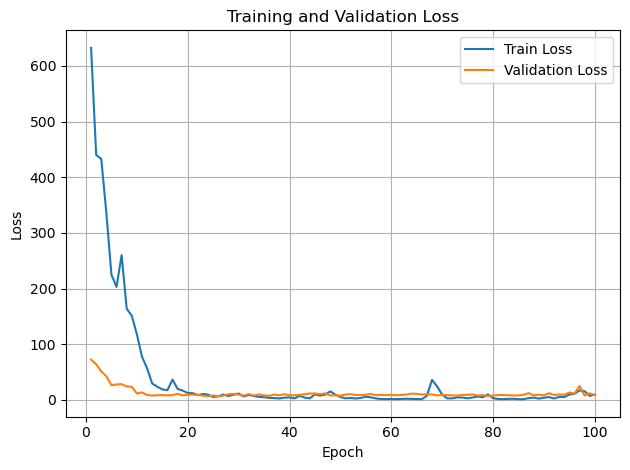

In [16]:
import torch.optim as optim
from tqdm import tqdm

import matplotlib.pyplot as plt

# 初始化模型
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BERT_CRF(num_labels=len(label2id)).to(device)

optimizer = optim.AdamW(model.parameters(), lr=5e-5)

num_epochs = 100
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in tqdm(train_loader, desc=f'Epoch {epoch+1}'):
        input_ids, attention_mask, labels = [x.to(device) for x in batch[:3]]

        optimizer.zero_grad()
        loss = model(input_ids, attention_mask, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    
    # === Validation ===
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            input_ids, attention_mask, labels = [x.to(device) for x in batch[:3]]
            val_loss = model(input_ids, attention_mask, labels)
            total_val_loss += val_loss.item()

    train_losses.append(total_loss)
    val_losses.append(total_val_loss)

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {total_loss:.4f} | Val Loss: {total_val_loss:.4f}")

plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
from sklearn.metrics import precision_recall_fscore_support

model.eval()
all_true_labels = []
all_pred_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = [x.to(device) for x in batch[:3]]
        word_lists, word_id_lists = batch[3], batch[4]
        # sep_none_type = [x.to(device) for x in batch[5]]
        predictions = model(input_ids, attention_mask)

        for i in range(len(word_lists)):
            word_list = word_lists[i]          # 原始詞 list
            word_ids = word_id_lists[i]        # token 對應的 word index
            preds = predictions[i]
            trues = labels[i]
            tokens = input_ids[i]

            for idx, word_idx in enumerate(word_ids):
                if word_idx is None:
                    continue
                word = word_list[word_idx]
                if word == "[SEP]" and trues[idx].item() != -1:
                    all_true_labels.append(id2label[trues[idx].item()])
                    all_pred_labels.append(id2label[preds[idx]])

print(f"True Labels: {len(all_true_labels)}, Pred Labels: {len(all_pred_labels)}")
print(f"Unique True Labels: {set(all_true_labels)}")
print(f"Unique Pred Labels: {set(all_pred_labels)}")

precision, recall, f1, _ = precision_recall_fscore_support(
    all_true_labels, all_pred_labels, average="macro"
)

print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")


True Labels: 781, Pred Labels: 781
Unique True Labels: {'conclusions', 'O', 'background', 'methods', 'objective', 'results'}
Unique Pred Labels: {'conclusions', 'O', 'background', 'methods', 'objective', 'results'}
Test Precision: 0.7736
Test Recall: 0.8016
Test F1 Score: 0.7845


In [18]:
from sklearn.metrics import accuracy_score
precision, recall, f1, _ = precision_recall_fscore_support(
    all_true_labels, all_pred_labels, average="weighted"
)

print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

print(f"Test Accuracy: {accuracy_score(all_true_labels, all_pred_labels)}")

Test Precision: 0.9655
Test Recall: 0.9603
Test F1 Score: 0.9624
Test Accuracy: 0.9603072983354674


In [19]:
from sklearn.metrics import classification_report

print(classification_report(all_true_labels, all_pred_labels, digits=4))


              precision    recall  f1-score   support

           O     0.2857    0.4444    0.3478         9
  background     0.9902    0.9620    0.9759       316
 conclusions     1.0000    0.9950    0.9975       202
     methods     0.9552    0.9343    0.9446       137
   objective     0.5000    0.5000    0.5000         2
     results     0.9106    0.9739    0.9412       115

    accuracy                         0.9603       781
   macro avg     0.7736    0.8016    0.7845       781
weighted avg     0.9655    0.9603    0.9624       781



In [20]:
from sklearn.metrics import accuracy_score
precision, recall, f1, _ = precision_recall_fscore_support(
    all_true_labels, all_pred_labels, average="micro"
)

print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

print(f"Test Accuracy: {accuracy_score(all_true_labels, all_pred_labels)}")

Test Precision: 0.9603
Test Recall: 0.9603
Test F1 Score: 0.9603
Test Accuracy: 0.9603072983354674


In [21]:
torch.save(model.state_dict(), "models/bert_crf_pubMed_pretrained_300seed.pth")

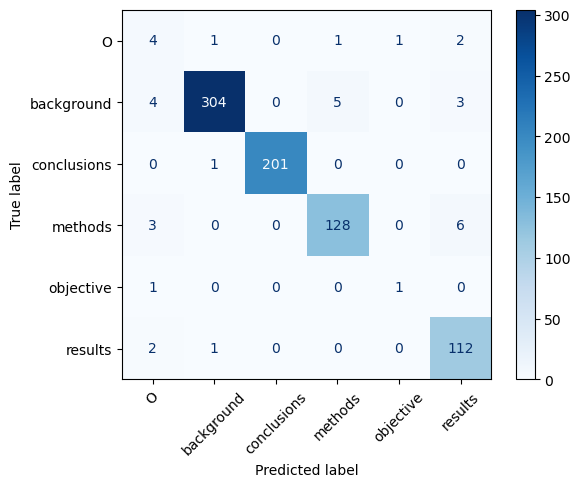

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
labels = sorted(set(all_true_labels) | set(all_pred_labels))  # 統一所有可能的 label

cm = confusion_matrix(all_true_labels, all_pred_labels, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation=45, cmap="Blues")

## MixText

### pre-process

In [ ]:
import pandas as pd

df = pd.read_csv('Processed_Headings/normalized_section_data 2.csv')
df.head()

In [ ]:
# df = df.dropna(subset=['sec-norm'])

In [ ]:
df_grouped = df.groupby(["PMCID", "PMID"]).agg(list)
df_grouped

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df_grouped, test_size=0.1, random_state=49, shuffle=True)
len(train_df), len(test_df)

In [ ]:
test_pmc_list = [tup[0] for tup in test_df.index.tolist()]

In [ ]:
# df_test = df.dropna(subset=['sec-norm'])
df_test = df

In [ ]:
df_test = df_test[df_test['PMCID'].isin(test_pmc_list)]
df_test = df_test[(df_test['PMCID'] != 0) 
                    & (df_test['PMCID'].notna())
                    & (df_test['PMID'] != 0) 
                    & (df_test['PMID'].notna()) ]
df_test = df_test.drop_duplicates(subset=['PMCID', 'PMID', 'sec-title'])
df_test

In [ ]:
df_test = df_test.drop(columns=['sec-type'])
df_test

In [ ]:
test_df = df_test.groupby(["PMCID", "PMID"]).agg(list)
test_df

In [ ]:
test_df = test_df.reset_index()
test_df = test_df.drop_duplicates(subset=['PMCID'])

In [ ]:
test_df

In [ ]:
test_df[500:800].to_csv('seq_for_manual_labeled_removed_duplicate3.csv')

### get test from annotation

In [18]:
import pandas as pd
test_df = pd.read_csv('data/test_annotated.csv')
test_df

,PMCID,PMID,sec-title,sec-norm
0,PMC11184573,38888203,"['INTRODUCTION', 'MATERIALS AND METHODS', 'DIS...","['background', 'methods', 'conclusions', 'conc..."
1,PMC11183239,38886373,"['Introduction', 'Subjects and methods', 'Resu...","['background', 'methods', 'results', 'conclusi..."
2,PMC11187291,38903966,"['Introduction', 'Methods', 'Results', 'Discus...","['background', 'methods', 'results', 'conclusi..."
3,PMC11177991,38883749,"['INTRODUCTION', 'MATERIALS AND METHODS', 'RES...","['background', 'methods', 'results', 'conclusi..."
4,PMC11187304,38903638,"['Introduction', 'Methods', 'Case reports', 'D...","['background', 'methods', 'methods', 'conclusi..."
...,...,...,...,...
155,PMC11181322,38771959,"['Introduction', 'Results and Discussion', 'Co...","['background', 'conclusions', 'conclusions', '..."
156,PMC11186409,38899065,"['Introduction', 'Materials and methods', 'Res...","['background', 'methods', 'results', 'conclusi..."
157,PMC11185683,38895272,"['Introduction', 'Results', 'Discussion', 'Mat...","['background', 'results', 'conclusions', 'meth..."
158,PMC11161898,38854388,"['METHODS', 'RESULTS', 'DISCUSSION', 'Notes']","['methods', 'results', 'conclusions', 'backgro..."


In [19]:
import ast
import numpy as np

# import numpy as np

def eval_with_nan(x):
    if isinstance(x, list):
        return [np.nan if (isinstance(i, float) and np.isnan(i)) else i for i in x]
    try:
        # 這邊直接 eval 而且給定 locals
        val = eval(x, {"nan": np.nan, "NaN": np.nan, "np": np})
        if isinstance(val, list):
            return [np.nan if (isinstance(i, float) and np.isnan(i)) else i for i in val]
        else:
            return val
    except Exception:
        return x  # 如果 eval 還失敗就原樣保留

# 用在你的 dataframe 上
# df_j['sec-norm'] = df_j['sec-norm'].apply(eval_with_nan)




In [20]:
test_df['sec-title'] = test_df['sec-title'].apply(ast.literal_eval)
test_df['sec-norm'] = test_df['sec-norm'].apply(eval_with_nan)

In [21]:
test_df

,PMCID,PMID,sec-title,sec-norm
0,PMC11184573,38888203,"[INTRODUCTION, MATERIALS AND METHODS, DISCUSSI...","[background, methods, conclusions, conclusions..."
1,PMC11183239,38886373,"[Introduction, Subjects and methods, Results, ...","[background, methods, results, conclusions, co..."
2,PMC11187291,38903966,"[Introduction, Methods, Results, Discussion, C...","[background, methods, results, conclusions, co..."
3,PMC11177991,38883749,"[INTRODUCTION, MATERIALS AND METHODS, RESULTS,...","[background, methods, results, conclusions, co..."
4,PMC11187304,38903638,"[Introduction, Methods, Case reports, Discussi...","[background, methods, methods, conclusions, co..."
...,...,...,...,...
155,PMC11181322,38771959,"[Introduction, Results and Discussion, Conclus...","[background, conclusions, conclusions, methods..."
156,PMC11186409,38899065,"[Introduction, Materials and methods, Results,...","[background, methods, results, conclusions, ba..."
157,PMC11185683,38895272,"[Introduction, Results, Discussion, Materials ...","[background, results, conclusions, methods]"
158,PMC11161898,38854388,"[METHODS, RESULTS, DISCUSSION, Notes]","[methods, results, conclusions, background]"


In [22]:
import pandas as pd

def convert_to_sep_format(row):
    titles = row["sec-title"]  # 取得標題列表
    labels = row["sec-norm"]   # 取得標籤列表

    inputs_with_sep = []
    labels_with_sep = []

    for i, title in enumerate(titles):
        inputs_with_sep.append(title)
        labels_with_sep.append("O")  # 一般 token 標記為 "O"
        
        # 在每個標題後面插入 [SEP]，對應標籤來自 sec-norm
        if i < len(labels):  # 確保標籤數量正確
            inputs_with_sep.append("[SEP]")
            if pd.isna(labels[i]):
                labels_with_sep.append('-100') ## none labeled
            else:
                labels_with_sep.append(labels[i])  # 讓 [SEP] 位置承擔標籤

    return pd.Series([inputs_with_sep, labels_with_sep])


# 對 DataFrame 進行轉換
# train_df[["inputs_with_sep", "labels_with_sep"]] = train_df.apply(convert_to_sep_format, axis=1)
test_df[["inputs_with_sep", "labels_with_sep"]] = test_df.apply(convert_to_sep_format, axis=1)


# train_df = train_df[
#     train_df['labels_with_sep'].apply(len) - train_df['labels_with_sep'].apply(lambda x: x.count('O')) > 0
# ]
test_df = test_df[
    test_df['labels_with_sep'].apply(len) - test_df['labels_with_sep'].apply(lambda x: x.count('O')) > 0
]
test_df

,PMCID,PMID,sec-title,sec-norm,inputs_with_sep,labels_with_sep
0,PMC11184573,38888203,"[INTRODUCTION, MATERIALS AND METHODS, DISCUSSI...","[background, methods, conclusions, conclusions...","[INTRODUCTION, [SEP], MATERIALS AND METHODS, [...","[O, background, O, methods, O, conclusions, O,..."
1,PMC11183239,38886373,"[Introduction, Subjects and methods, Results, ...","[background, methods, results, conclusions, co...","[Introduction, [SEP], Subjects and methods, [S...","[O, background, O, methods, O, results, O, con..."
2,PMC11187291,38903966,"[Introduction, Methods, Results, Discussion, C...","[background, methods, results, conclusions, co...","[Introduction, [SEP], Methods, [SEP], Results,...","[O, background, O, methods, O, results, O, con..."
3,PMC11177991,38883749,"[INTRODUCTION, MATERIALS AND METHODS, RESULTS,...","[background, methods, results, conclusions, co...","[INTRODUCTION, [SEP], MATERIALS AND METHODS, [...","[O, background, O, methods, O, results, O, con..."
4,PMC11187304,38903638,"[Introduction, Methods, Case reports, Discussi...","[background, methods, methods, conclusions, co...","[Introduction, [SEP], Methods, [SEP], Case rep...","[O, background, O, methods, O, methods, O, con..."
...,...,...,...,...,...,...
155,PMC11181322,38771959,"[Introduction, Results and Discussion, Conclus...","[background, conclusions, conclusions, methods...","[Introduction, [SEP], Results and Discussion, ...","[O, background, O, conclusions, O, conclusions..."
156,PMC11186409,38899065,"[Introduction, Materials and methods, Results,...","[background, methods, results, conclusions, ba...","[Introduction, [SEP], Materials and methods, [...","[O, background, O, methods, O, results, O, con..."
157,PMC11185683,38895272,"[Introduction, Results, Discussion, Materials ...","[background, results, conclusions, methods]","[Introduction, [SEP], Results, [SEP], Discussi...","[O, background, O, results, O, conclusions, O,..."
158,PMC11161898,38854388,"[METHODS, RESULTS, DISCUSSION, Notes]","[methods, results, conclusions, background]","[METHODS, [SEP], RESULTS, [SEP], DISCUSSION, [...","[O, methods, O, results, O, conclusions, O, ba..."


In [23]:
# train_df = train_df.drop(columns=['sec-type', 'sec-title', 'sec-norm'])
test_df = test_df.drop(columns=[ 'sec-title', 'sec-norm'])

In [ ]:
# train_df

In [24]:
test_df

,PMCID,PMID,inputs_with_sep,labels_with_sep
0,PMC11184573,38888203,"[INTRODUCTION, [SEP], MATERIALS AND METHODS, [...","[O, background, O, methods, O, conclusions, O,..."
1,PMC11183239,38886373,"[Introduction, [SEP], Subjects and methods, [S...","[O, background, O, methods, O, results, O, con..."
2,PMC11187291,38903966,"[Introduction, [SEP], Methods, [SEP], Results,...","[O, background, O, methods, O, results, O, con..."
3,PMC11177991,38883749,"[INTRODUCTION, [SEP], MATERIALS AND METHODS, [...","[O, background, O, methods, O, results, O, con..."
4,PMC11187304,38903638,"[Introduction, [SEP], Methods, [SEP], Case rep...","[O, background, O, methods, O, methods, O, con..."
...,...,...,...,...
155,PMC11181322,38771959,"[Introduction, [SEP], Results and Discussion, ...","[O, background, O, conclusions, O, conclusions..."
156,PMC11186409,38899065,"[Introduction, [SEP], Materials and methods, [...","[O, background, O, methods, O, results, O, con..."
157,PMC11185683,38895272,"[Introduction, [SEP], Results, [SEP], Discussi...","[O, background, O, results, O, conclusions, O,..."
158,PMC11161898,38854388,"[METHODS, [SEP], RESULTS, [SEP], DISCUSSION, [...","[O, methods, O, results, O, conclusions, O, ba..."


In [25]:
# train_df.to_csv('Processed_Headings/train_df.csv')
test_df.to_csv('Processed_Headings/test_df.csv')

### val split

In [1]:
import pandas as pd
train_df = pd.read_csv('data/train_annotated.csv')


In [2]:
import ast
import numpy as np

def eval_with_nan(x):
    if isinstance(x, list):
        return [np.nan if (isinstance(i, float) and np.isnan(i)) else i for i in x]
    try:
        # 這邊直接 eval 而且給定 locals
        val = eval(x, {"nan": np.nan, "NaN": np.nan, "np": np})
        if isinstance(val, list):
            return [np.nan if (isinstance(i, float) and np.isnan(i)) else i for i in val]
        else:
            return val
    except Exception:
        return x  # 如果 eval 還失敗就原樣保留


In [3]:
train_df['sec-title'] = train_df['sec-title'].apply(ast.literal_eval)
train_df['sec-norm'] = train_df['sec-norm'].apply(eval_with_nan)

In [4]:
train_df

,PMCID,PMID,sec-title,sec-norm
0,PMC11191691,38842535,"[Introduction, Results and Discussion, Conclus...","[background, conclusions, conclusions, backgro..."
1,PMC11182025,38887617,"[Introduction, Materials & Methods, Results, D...","[background, methods, results, conclusions, co..."
2,PMC10511328,37704722,"[Main, Pooled longitudinal analyses, Populatio...","[background, results, results, results, result..."
3,PMC10632145,37914938,"[Main, Population imaging and single-cell acti...","[background, results, results, results, result..."
4,PMC1084334,15884974,"[Introduction, Results, Discussion, Materials ...","[background, results, conclusions, methods, ba..."
...,...,...,...,...
635,PMC11187391,38123960,[Ethics statements],[nan]
636,PMC11187998,38903349,"[Introduction, Case presentation, Discussion, ...","[background, methods, conclusions, conclusions]"
637,PMC11191920,38905421,"[1. Introduction, 2. Patients and methods, 3. ...","[background, methods, results, conclusions, ba..."
638,PMC10978839,38548747,"[Introduction, Results, Discussion, Materials ...","[background, results, conclusions, methods, ba..."


In [5]:
import pandas as pd

def convert_to_sep_format(row):
    titles = row["sec-title"]  # 取得標題列表
    labels = row["sec-norm"]   # 取得標籤列表

    inputs_with_sep = []
    labels_with_sep = []

    for i, title in enumerate(titles):
        inputs_with_sep.append(title)
        labels_with_sep.append("O")  # 一般 token 標記為 "O"
        
        # 在每個標題後面插入 [SEP]，對應標籤來自 sec-norm
        if i < len(labels):  # 確保標籤數量正確
            inputs_with_sep.append("[SEP]")
            if pd.isna(labels[i]):
                labels_with_sep.append('-100') ## none labeled
            else:
                labels_with_sep.append(labels[i])  # 讓 [SEP] 位置承擔標籤

    return pd.Series([inputs_with_sep, labels_with_sep])


# 對 DataFrame 進行轉換
train_df[["inputs_with_sep", "labels_with_sep"]] = train_df.apply(convert_to_sep_format, axis=1)
train_df = train_df[
    train_df['labels_with_sep'].apply(len) - train_df['labels_with_sep'].apply(lambda x: x.count('O')) > 0
]


In [6]:
train_df = train_df.drop(columns=['sec-title', 'sec-norm'])
train_df

,PMCID,PMID,inputs_with_sep,labels_with_sep
0,PMC11191691,38842535,"[Introduction, [SEP], Results and Discussion, ...","[O, background, O, conclusions, O, conclusions..."
1,PMC11182025,38887617,"[Introduction, [SEP], Materials & Methods, [SE...","[O, background, O, methods, O, results, O, con..."
2,PMC10511328,37704722,"[Main, [SEP], Pooled longitudinal analyses, [S...","[O, background, O, results, O, results, O, res..."
3,PMC10632145,37914938,"[Main, [SEP], Population imaging and single-ce...","[O, background, O, results, O, results, O, res..."
4,PMC1084334,15884974,"[Introduction, [SEP], Results, [SEP], Discussi...","[O, background, O, results, O, conclusions, O,..."
...,...,...,...,...
635,PMC11187391,38123960,"[Ethics statements, [SEP]]","[O, -100]"
636,PMC11187998,38903349,"[Introduction, [SEP], Case presentation, [SEP]...","[O, background, O, methods, O, conclusions, O,..."
637,PMC11191920,38905421,"[1. Introduction, [SEP], 2. Patients and metho...","[O, background, O, methods, O, results, O, con..."
638,PMC10978839,38548747,"[Introduction, [SEP], Results, [SEP], Discussi...","[O, background, O, results, O, conclusions, O,..."


In [7]:
from sklearn.model_selection import train_test_split

# 將 train_df 拆成 87.5% 訓練資料 和 12.5% 驗證資料
train_df, val_df = train_test_split(train_df, test_size=1/8, random_state=42, shuffle=True)

train_df

,PMCID,PMID,inputs_with_sep,labels_with_sep
304,PMC11189173,38900748,"[Introduction, [SEP], Methods, [SEP], Result, ...","[O, background, O, methods, O, results, O, con..."
414,PMC11180756,38887229,"[Introduction, [SEP], Materials and methods, [...","[O, background, O, methods, O, results, O, con..."
577,PMC11073751,38716403,"[Background, [SEP], Methods, [SEP], Results, [...","[O, background, O, methods, O, results, O, con..."
259,PMC10962890,38131617,"[INTRODUCTION, [SEP], METHODS, [SEP], RESULTS,...","[O, background, O, methods, O, results, O, con..."
594,PMC11152445,38896724,"[INTRODUCTION, [SEP], OUTCOMES AFTER INTENSIVE...","[O, background, O, -100, O, -100, O, -100, O, ..."
...,...,...,...,...
71,PMC11192717,38906906,"[Introduction, [SEP], Results, [SEP], Discussi...","[O, background, O, results, O, conclusions, O,..."
106,PMC11192365,38857285,"[Introduction, [SEP], Results, [SEP], Discussi...","[O, background, O, results, O, conclusions, O,..."
270,PMC11186357,38904030,"[Introduction, [SEP], Materials and Methods, [...","[O, background, O, methods, O, results, O, con..."
435,PMC11189877,38900377,"[Background, [SEP], Case presentation, [SEP], ...","[O, background, O, methods, O, conclusions, O,..."


In [8]:
val_df

,PMCID,PMID,inputs_with_sep,labels_with_sep
570,PMC11186153,38898433,"[Introduction, [SEP], Materials and methods, [...","[O, background, O, methods, O, results, O, con..."
265,PMC11184630,38894760,"[Introduction, [SEP], Case presentation, [SEP]...","[O, background, O, methods, O, conclusions, O,..."
291,PMC1065320,15743470,"[Introduction, [SEP], Materials and methods, [...","[O, background, O, methods, O, results, O, con..."
597,PMC11180906,38887537,"[Introduction, [SEP], Materials and methods, [...","[O, background, O, methods, O, results, O, con..."
174,PMC11184868,38886767,"[Background, [SEP], Stem-cell derived ECs, [SE...","[O, background, O, -100, O, -100, O, -100, O, ..."
...,...,...,...,...
527,PMC11190884,38842026,"[Introduction, [SEP], Nucleic Acid, [SEP], Bio...","[O, background, O, results, O, results, O, res..."
86,PMC11188041,36347335,"[Introduction, [SEP], Materials and methods, [...","[O, background, O, methods, O, results, O, con..."
369,PMC11186168,38890641,"[Introduction, [SEP], Methods, [SEP], Results,...","[O, background, O, methods, O, results, O, con..."
636,PMC11187998,38903349,"[Introduction, [SEP], Case presentation, [SEP]...","[O, background, O, methods, O, conclusions, O,..."


In [9]:
val_df.to_csv('Processed_Headings/val_df.csv')

### from here

In [1]:
import pandas as pd
train_df = pd.read_csv('Processed_Headings/train_df.csv')
val_df = pd.read_csv('Processed_Headings/val_df.csv')
test_df = pd.read_csv('Processed_Headings/test_df.csv')

In [2]:
import ast

train_df['inputs_with_sep'] = train_df['inputs_with_sep'].apply(ast.literal_eval)
train_df['labels_with_sep'] = train_df['labels_with_sep'].apply(ast.literal_eval)

val_df['inputs_with_sep'] = val_df['inputs_with_sep'].apply(ast.literal_eval)
val_df['labels_with_sep'] = val_df['labels_with_sep'].apply(ast.literal_eval)

test_df['inputs_with_sep'] = test_df['inputs_with_sep'].apply(ast.literal_eval)
test_df['labels_with_sep'] = test_df['labels_with_sep'].apply(ast.literal_eval)

In [3]:
train_df

,PMCID,PMID,inputs_with_sep,labels_with_sep
0,PMC6254157,19384281,"[1. Introduction, [SEP], 2. Results and Discus...","[O, -100, O, -100, O, -100, O, -100]"
1,PMC4032680,24955383,"[1. Introduction, [SEP], 2. Model Hypotheses, ...","[O, -100, O, -100, O, -100, O, -100, O, -100, ..."
2,PMC6723279,31349708,"[1. Introduction, [SEP], 2. Materials and Meth...","[O, -100, O, -100, O, -100, O, -100, O, -100]"
3,PMC5290626,28159004,"[Introduction, [SEP], Large scale visualizatio...","[O, background, O, -100, O, -100, O, -100, O, ..."
4,PMC4172818,25193322,"[Background, [SEP], Methods, [SEP], Results, [...","[O, background, O, methods, O, results, O, con..."
...,...,...,...,...
1922647,PMC3786481,24155782,"[Introduction, [SEP], Conclusions, [SEP]]","[O, background, O, conclusions]"
1922648,PMC7926844,33671592,"[1. Introduction, [SEP], 2. Materials and Meth...","[O, -100, O, -100, O, -100, O, -100, O, -100]"
1922649,PMC11190545,0,"[Introduction, [SEP], Dataset description, [SE...","[O, background, O, -100, O, methods, O, -100, ..."
1922650,PMC3952259,0,"[Introduction, [SEP], Objectives, [SEP], Metho...","[O, background, O, objective, O, methods, O, r..."


In [4]:
val_df

,Unnamed: 0,PMCID,PMID,inputs_with_sep,labels_with_sep
0,570,PMC11186153,38898433,"[Introduction, [SEP], Materials and methods, [...","[O, background, O, methods, O, results, O, con..."
1,265,PMC11184630,38894760,"[Introduction, [SEP], Case presentation, [SEP]...","[O, background, O, methods, O, conclusions, O,..."
2,291,PMC1065320,15743470,"[Introduction, [SEP], Materials and methods, [...","[O, background, O, methods, O, results, O, con..."
3,597,PMC11180906,38887537,"[Introduction, [SEP], Materials and methods, [...","[O, background, O, methods, O, results, O, con..."
4,174,PMC11184868,38886767,"[Background, [SEP], Stem-cell derived ECs, [SE...","[O, background, O, -100, O, -100, O, -100, O, ..."
...,...,...,...,...,...
75,527,PMC11190884,38842026,"[Introduction, [SEP], Nucleic Acid, [SEP], Bio...","[O, background, O, results, O, results, O, res..."
76,86,PMC11188041,36347335,"[Introduction, [SEP], Materials and methods, [...","[O, background, O, methods, O, results, O, con..."
77,369,PMC11186168,38890641,"[Introduction, [SEP], Methods, [SEP], Results,...","[O, background, O, methods, O, results, O, con..."
78,636,PMC11187998,38903349,"[Introduction, [SEP], Case presentation, [SEP]...","[O, background, O, methods, O, conclusions, O,..."


In [5]:
test_df

,Unnamed: 0,PMCID,PMID,inputs_with_sep,labels_with_sep
0,0,PMC11184573,38888203,"[INTRODUCTION, [SEP], MATERIALS AND METHODS, [...","[O, background, O, methods, O, conclusions, O,..."
1,1,PMC11183239,38886373,"[Introduction, [SEP], Subjects and methods, [S...","[O, background, O, methods, O, results, O, con..."
2,2,PMC11187291,38903966,"[Introduction, [SEP], Methods, [SEP], Results,...","[O, background, O, methods, O, results, O, con..."
3,3,PMC11177991,38883749,"[INTRODUCTION, [SEP], MATERIALS AND METHODS, [...","[O, background, O, methods, O, results, O, con..."
4,4,PMC11187304,38903638,"[Introduction, [SEP], Methods, [SEP], Case rep...","[O, background, O, methods, O, methods, O, con..."
...,...,...,...,...,...
155,155,PMC11181322,38771959,"[Introduction, [SEP], Results and Discussion, ...","[O, background, O, conclusions, O, conclusions..."
156,156,PMC11186409,38899065,"[Introduction, [SEP], Materials and methods, [...","[O, background, O, methods, O, results, O, con..."
157,157,PMC11185683,38895272,"[Introduction, [SEP], Results, [SEP], Discussi...","[O, background, O, results, O, conclusions, O,..."
158,158,PMC11161898,38854388,"[METHODS, [SEP], RESULTS, [SEP], DISCUSSION, [...","[O, methods, O, results, O, conclusions, O, ba..."


In [6]:
# df_grouped

In [7]:
# type(df_grouped["labels_with_sep"][0])

In [8]:


import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
os.environ["TORCH_USE_CUDA_DSA"] = "1"

import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [9]:


# torch_pad = pad_sequence(sep_none_type, batch_first=True, padding_value=-1)

In [10]:
from torch.utils.data import DataLoader
from transformers import BertTokenizerFast
from transformers import AutoTokenizer, AutoModel



tokenizer = AutoTokenizer.from_pretrained("microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract-fulltext")

MAX_LENGTH = 20  # 你希望的最大序列長度

def collate_fn(batch):
    input_ids, attention_masks, labels, word_lists, word_id_lists, sep_none_type = zip(*batch)
    return (
        torch.stack(input_ids),
        torch.stack(attention_masks),
        torch.stack(labels),
        list(word_lists),
        list(word_id_lists),  # list of lists，不要 stack
        torch.stack(sep_none_type)
    )


In [11]:
import torch
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [12]:

from transformers import BertTokenizer
from torch.utils.data import Dataset, DataLoader
from collections import defaultdict

# 載入 BERT Tokenizer
# tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# 建立標籤映射表

label2id = {"-100": 0, "O": 0, "objective": 1, "background": 2, "methods": 3, "results": 4, "conclusions": 5}
# label2id = defaultdict(int, label2id)
id2label = {v: k for k, v in label2id.items()}
class SectionDataset(Dataset):
    def __init__(self, df, tokenizer, max_length=MAX_LENGTH):
        self.df = df
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        inputs_with_sep = ['[CLS]'] + row["inputs_with_sep"]  # 原始詞列表
        label_with_sep = ['0'] + row["labels_with_sep"]
        sep_none_type = [1 if label == "-100" else 0 for label in label_with_sep]

        # Tokenize
        encoded = self.tokenizer(
            inputs_with_sep,
            is_split_into_words=True,
            padding="max_length",
            truncation=True,
            max_length=self.max_length,
            return_tensors="pt"
        )

        input_ids = encoded["input_ids"].squeeze(0)
        attention_mask = encoded["attention_mask"].squeeze(0)

        # 根據 word_ids 展開 label 給每個 token
        word_ids = encoded.word_ids(batch_index=0)
        labels_per_token = []
        sep_none_type_per_token = []

        for word_idx in word_ids:
            if word_idx is None:
                labels_per_token.append(0)  # special tokens
                sep_none_type_per_token.append(0)
            else:
                label_name = label_with_sep[word_idx]
                label_id = label2id.get(label_name, 0)  # fallback 用 "O"
                labels_per_token.append(label_id)
                sep_none_type_per_token.append(sep_none_type[word_idx])

        labels = torch.tensor(labels_per_token, dtype=torch.long)
        sep_none_type = torch.tensor(sep_none_type_per_token, dtype=torch.long)

        return input_ids, attention_mask, labels, inputs_with_sep, word_ids, sep_none_type






train_dataset = SectionDataset(train_df, tokenizer)
val_dataset = SectionDataset(val_df, tokenizer)
test_dataset = SectionDataset(test_df, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=100, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=True, collate_fn=collate_fn)



In [13]:
# num_tags = 6  # 你模型輸出的類別數，請替換成正確的值

# for i, batch in tqdm(enumerate(train_loader)):
#     input_ids, attention_mask, labels, word_lists, word_id_lists, sep_none_type = batch
    
#     # 把資料移到 CPU 來看清楚錯誤
#     labels_cpu = labels.cpu()

#     # 檢查 label 是否越界
#     if labels_cpu.min() < 0 or labels_cpu.max() >= num_tags:
#         print(f"🚨 Label Error in Batch {i}")
#         print("labels.shape:", labels.shape)
#         print("labels.min():", labels_cpu.min().item())
#         print("labels.max():", labels_cpu.max().item())
#         print("labels:", labels_cpu)
#         break  # 可以先中止程式跑，或改成 continue 繼續印出所有有問題的 batch

In [14]:
# !pip uninstall TorchCRF
# !pip install transformers==4.30.2


In [15]:
import os
os.environ["TORCH_USE_CUDA_DSA"] = "1"

In [16]:
import torch
import torch.nn as nn
from torchcrf import CRF
from transformers import BertModel
from torch.distributions import Beta

class MixTextCRF(CRF):
    def __init__(self, num_tags, batch_first=True):
        super().__init__(num_tags=num_tags, batch_first=batch_first)
        # 初始化 transition matrix
        nn.init.xavier_normal_(self.transitions)

        # Sample initial lambda from Beta(0.3, 0.3), then convert to logit
        lambda_sample = Beta(0.3, 0.3).sample()
        lambda_logit_init = torch.log(lambda_sample / (1 - lambda_sample))  # logit(lambda)

        # Create learnable logit parameter
        self.lambda_logit = nn.Parameter(lambda_logit_init.unsqueeze(0))

    def forward(self, emissions, tags, psuedo_tags=None, mask=None, reduction='mean', none_type=None, threshold=0.85):
        lambda_val = torch.sigmoid(self.lambda_logit)  # ensure λ in (0, 1)
        
        if reduction == 'mix':
            log_p_true = self.token_level_log_prob(emissions, tags)           # shape: [B, L]
            log_p_pseudo = self.token_level_log_prob(emissions, psuedo_tags)  # shape: [B, L]
            none_type = torch.stack(none_type)

            with torch.no_grad():
                log_probs = torch.log_softmax(emissions, dim=-1)
                max_probs, _ = torch.max(log_probs, dim=-1)
                confidence_mask = (max_probs > threshold)
            # print(type(none_type))
            # 建立 mask
            mask = mask.float()
            true_mask = ((none_type == 0).float()) * mask
            pseudo_mask = ((none_type == 1).float()) * mask * confidence_mask.float()
            
            # lambda 可從 Beta 分布，也可以是 N_true / N_total
            # lambda_val = 
            
            # 最後做 mix
            mixed_log_p = lambda_val * log_p_true * true_mask + (1 - lambda_val) * log_p_pseudo * pseudo_mask

            loss = - mixed_log_p.sum() / mask.sum()
            return loss

        else:
            loss = super().forward(emissions, tags, mask=mask, reduction=reduction)
            loss = loss / mask.sum()
            return loss

    def token_level_log_prob(self, emissions, tags):
        # emissions: [B, L, C]  -- logits
        # tags: [B, L] -- gold or pseudo labels
        log_probs = torch.log_softmax(emissions, dim=-1)  # shape: [B, L, C]
        selected = log_probs.gather(2, tags.unsqueeze(-1)).squeeze(-1)  # shape: [B, L]
        return selected


In [17]:

class BERT_CRF(nn.Module):
    def __init__(self, num_labels):
        super(BERT_CRF, self).__init__()
        self.bert = AutoModel.from_pretrained("microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract-fulltext")
        if hasattr(self.bert.embeddings, 'token_type_ids'):
            del self.bert.embeddings.token_type_ids  # 移除有毒 buffer

        self.hidden_dim = self.bert.config.hidden_size
        self.fc = nn.Linear(self.hidden_dim, num_labels)
        self.crf = MixTextCRF(num_labels, batch_first=True)

    def forward(self, input_ids, attention_mask, labels=None, sep_none_type=None):
        
        outputs = self.bert(input_ids, attention_mask=attention_mask)
        sequence_output = outputs.last_hidden_state
        emissions = self.fc(sequence_output)
        # print(emissions.shape)
        # print(sep_none_type)
        
        if labels is not None:
            if sep_none_type is not None and sum(t.sum() for t in sep_none_type) > 0:
                with torch.no_grad():
                    decoded = self.crf.decode(emissions, mask=attention_mask.bool())
                    psuedo_labels = []
                    for i, seq in enumerate(decoded):
                        label_tensor = torch.zeros_like(labels[i])  # 全為 0
                        valid_mask = ((labels[i] != 0) | (sep_none_type[i] == 1)) & (attention_mask[i] == 1)
                        valid_indices = valid_mask.nonzero(as_tuple=True)[0]

                        # 按順序填入 decode 的值
                        for j, idx in enumerate(valid_indices):
                            if j < len(seq):
                                label_tensor[idx] = seq[idx]
                
                        psuedo_labels.append(label_tensor)
                
                    psuedo_labels = torch.stack(psuedo_labels, dim=0)

                loss = self.crf(
                    emissions,
                    labels,
                    psuedo_tags=psuedo_labels,
                    mask=attention_mask.bool(),
                    reduction="mix",
                    none_type=sep_none_type
                )
                return loss
            
            else:
                loss = -self.crf(
                    emissions,
                    labels,
                    mask=attention_mask.bool(),
                    reduction="mean"
                )
                return loss
        else:
            return self.crf.decode(emissions, mask=attention_mask.bool())

Epoch 1:   5%|▌         | 1000/19227 [03:59<1:22:48,  3.67it/s]

[Step 1000] Train Loss: 0.03721892 | Val Loss: 0.00239841


Epoch 1:  10%|█         | 2000/19227 [07:59<1:14:15,  3.87it/s]

[Step 2000] Train Loss: 0.00069807 | Val Loss: 0.00304533


Epoch 1:  16%|█▌        | 3000/19227 [11:58<1:10:27,  3.84it/s]

[Step 3000] Train Loss: 0.00097042 | Val Loss: 0.00206825


Epoch 1:  21%|██        | 4000/19227 [15:56<1:05:16,  3.89it/s]

[Step 4000] Train Loss: 0.00038507 | Val Loss: 0.00328037


Epoch 1:  26%|██▌       | 5000/19227 [19:54<1:01:32,  3.85it/s]

[Step 5000] Train Loss: 0.00051058 | Val Loss: 0.00213151


Epoch 1:  31%|███       | 6000/19227 [23:54<56:59,  3.87it/s]  

[Step 6000] Train Loss: 0.00045982 | Val Loss: 0.00378275


Epoch 1:  36%|███▋      | 7000/19227 [27:52<53:22,  3.82it/s]

[Step 7000] Train Loss: 0.00033344 | Val Loss: 0.00208521


Epoch 1:  42%|████▏     | 8000/19227 [31:50<48:23,  3.87it/s]

[Step 8000] Train Loss: 0.00038227 | Val Loss: 0.00215454


Epoch 1:  47%|████▋     | 9000/19227 [35:48<43:37,  3.91it/s]

[Step 9000] Train Loss: 0.00036621 | Val Loss: 0.00217573


Epoch 1:  52%|█████▏    | 10000/19227 [39:47<40:11,  3.83it/s]

[Step 10000] Train Loss: 0.00021136 | Val Loss: 0.00283570


Epoch 1:  57%|█████▋    | 11000/19227 [43:46<35:42,  3.84it/s]

[Step 11000] Train Loss: 0.00024425 | Val Loss: 0.00285910


Epoch 1:  62%|██████▏   | 12000/19227 [47:44<31:03,  3.88it/s]

[Step 12000] Train Loss: 0.00028558 | Val Loss: 0.00209858


Epoch 1:  68%|██████▊   | 13000/19227 [51:43<26:56,  3.85it/s]

[Step 13000] Train Loss: 0.00025164 | Val Loss: 0.00210642


Epoch 1:  73%|███████▎  | 14000/19227 [55:44<22:29,  3.87it/s]  

[Step 14000] Train Loss: 0.00021941 | Val Loss: 0.00243365


Epoch 1:  78%|███████▊  | 15000/19227 [59:42<18:28,  3.81it/s]

[Step 15000] Train Loss: 0.00034722 | Val Loss: 0.00221809


Epoch 1:  83%|████████▎ | 16000/19227 [1:03:40<13:55,  3.86it/s]

[Step 16000] Train Loss: 0.00020291 | Val Loss: 0.00244773


Epoch 1:  88%|████████▊ | 17000/19227 [1:07:39<09:36,  3.86it/s]

[Step 17000] Train Loss: 0.00026528 | Val Loss: 0.00312494


Epoch 1:  94%|█████████▎| 18000/19227 [1:11:37<05:21,  3.82it/s]

[Step 18000] Train Loss: 0.00016054 | Val Loss: 0.00273838


Epoch 1:  99%|█████████▉| 19000/19227 [1:15:36<00:59,  3.84it/s]

[Step 19000] Train Loss: 0.00017950 | Val Loss: 0.00184385


Epoch 1: 100%|██████████| 19227/19227 [1:16:30<00:00,  4.19it/s]


Epoch 1/3, Train Loss (sum): 43.7396


Epoch 2:   4%|▍         | 773/19227 [03:03<1:19:08,  3.89it/s]

[Step 20000] Train Loss: 0.00017734 | Val Loss: 0.00223869


Epoch 2:   9%|▉         | 1773/19227 [07:02<1:16:05,  3.82it/s]

[Step 21000] Train Loss: 0.00041571 | Val Loss: 0.00167931


Epoch 2:  14%|█▍        | 2773/19227 [11:00<1:10:49,  3.87it/s]

[Step 22000] Train Loss: 0.00012130 | Val Loss: 0.00262237


Epoch 2:  20%|█▉        | 3773/19227 [14:57<1:06:26,  3.88it/s]

[Step 23000] Train Loss: 0.00008307 | Val Loss: 0.00271655


Epoch 2:  25%|██▍       | 4773/19227 [18:55<1:01:48,  3.90it/s]

[Step 24000] Train Loss: 0.00020138 | Val Loss: 0.00253083


Epoch 2:  30%|███       | 5773/19227 [22:54<57:27,  3.90it/s]  

[Step 25000] Train Loss: 0.00012402 | Val Loss: 0.00239446


Epoch 2:  35%|███▌      | 6773/19227 [26:54<53:58,  3.85it/s]  

[Step 26000] Train Loss: 0.00018342 | Val Loss: 0.00269314


Epoch 2:  40%|████      | 7773/19227 [30:52<49:26,  3.86it/s]

[Step 27000] Train Loss: 0.00010641 | Val Loss: 0.00270586


Epoch 2:  46%|████▌     | 8773/19227 [34:50<44:37,  3.90it/s]

[Step 28000] Train Loss: 0.00022925 | Val Loss: 0.00327482


Epoch 2:  51%|█████     | 9773/19227 [38:49<39:47,  3.96it/s]

[Step 29000] Train Loss: 0.00016959 | Val Loss: 0.00224179


Epoch 2:  56%|█████▌    | 10773/19227 [42:46<36:12,  3.89it/s]

[Step 30000] Train Loss: 0.00015145 | Val Loss: 0.00323407


Epoch 2:  61%|██████    | 11773/19227 [46:44<32:02,  3.88it/s]

[Step 31000] Train Loss: 0.00013756 | Val Loss: 0.00397784


Epoch 2:  66%|██████▋   | 12773/19227 [50:42<28:01,  3.84it/s]

[Step 32000] Train Loss: 0.00041850 | Val Loss: 0.00156501


Epoch 2:  72%|███████▏  | 13773/19227 [54:41<24:27,  3.72it/s]

[Step 33000] Train Loss: 0.00011611 | Val Loss: 0.00230555


Epoch 2:  77%|███████▋  | 14773/19227 [58:39<19:30,  3.80it/s]

[Step 34000] Train Loss: 0.00008445 | Val Loss: 0.00180541


Epoch 2:  82%|████████▏ | 15773/19227 [1:02:37<15:06,  3.81it/s]

[Step 35000] Train Loss: 0.00007940 | Val Loss: 0.00281738


Epoch 2:  87%|████████▋ | 16773/19227 [1:06:35<10:32,  3.88it/s]

[Step 36000] Train Loss: 0.00038628 | Val Loss: 0.00228427


Epoch 2:  92%|█████████▏| 17773/19227 [1:10:34<06:17,  3.85it/s]

[Step 37000] Train Loss: 0.00019662 | Val Loss: 0.00179154


Epoch 2:  98%|█████████▊| 18773/19227 [1:14:34<01:56,  3.88it/s]

[Step 38000] Train Loss: 0.00007006 | Val Loss: 0.00142845


Epoch 2: 100%|██████████| 19227/19227 [1:16:22<00:00,  4.20it/s]


Epoch 2/3, Train Loss (sum): 3.4663


Epoch 3:   3%|▎         | 546/19227 [02:10<1:21:59,  3.80it/s]

[Step 39000] Train Loss: 0.00015303 | Val Loss: 0.00176651


Epoch 3:   8%|▊         | 1546/19227 [06:11<1:17:25,  3.81it/s]

[Step 40000] Train Loss: 0.00009507 | Val Loss: 0.00304038


Epoch 3:  13%|█▎        | 2546/19227 [10:13<1:13:29,  3.78it/s]

[Step 41000] Train Loss: 0.00046467 | Val Loss: 0.00266557


Epoch 3:  18%|█▊        | 3546/19227 [14:13<1:08:48,  3.80it/s]

[Step 42000] Train Loss: 0.00011310 | Val Loss: 0.00204782


Epoch 3:  24%|██▎       | 4546/19227 [18:14<1:03:49,  3.83it/s]

[Step 43000] Train Loss: 0.00017335 | Val Loss: 0.00152295


Epoch 3:  29%|██▉       | 5546/19227 [22:13<58:12,  3.92it/s]  

[Step 44000] Train Loss: 0.00004702 | Val Loss: 0.00186577


Epoch 3:  34%|███▍      | 6546/19227 [26:12<53:52,  3.92it/s]

[Step 45000] Train Loss: 0.00007482 | Val Loss: 0.00187483


Epoch 3:  39%|███▉      | 7546/19227 [30:09<50:06,  3.89it/s]

[Step 46000] Train Loss: 0.00017572 | Val Loss: 0.00171585


Epoch 3:  44%|████▍     | 8546/19227 [34:05<45:58,  3.87it/s]

[Step 47000] Train Loss: 0.00006720 | Val Loss: 0.00207211


Epoch 3:  50%|████▉     | 9546/19227 [38:03<41:29,  3.89it/s]

[Step 48000] Train Loss: 0.00023183 | Val Loss: 0.00191613


Epoch 3:  55%|█████▍    | 10546/19227 [42:03<38:06,  3.80it/s]

[Step 49000] Train Loss: 0.00020827 | Val Loss: 0.00170533


Epoch 3:  60%|██████    | 11546/19227 [46:04<34:12,  3.74it/s]  

[Step 50000] Train Loss: 0.00045500 | Val Loss: 0.00188866


Epoch 3:  65%|██████▌   | 12546/19227 [50:02<29:07,  3.82it/s]

[Step 51000] Train Loss: 0.00010313 | Val Loss: 0.00151692


Epoch 3:  70%|███████   | 13546/19227 [54:01<24:05,  3.93it/s]

[Step 52000] Train Loss: 0.00007553 | Val Loss: 0.00249628


Epoch 3:  76%|███████▌  | 14546/19227 [58:01<20:17,  3.85it/s]

[Step 53000] Train Loss: 0.00045553 | Val Loss: 0.00197164


Epoch 3:  81%|████████  | 15546/19227 [1:01:59<16:00,  3.83it/s]

[Step 54000] Train Loss: 0.00006525 | Val Loss: 0.00209744


Epoch 3:  86%|████████▌ | 16546/19227 [1:05:58<11:41,  3.82it/s]

[Step 55000] Train Loss: 0.00004313 | Val Loss: 0.00282504


Epoch 3:  91%|█████████▏| 17546/19227 [1:09:57<07:14,  3.87it/s]

[Step 56000] Train Loss: 0.00008526 | Val Loss: 0.00301504


Epoch 3:  96%|█████████▋| 18546/19227 [1:13:54<02:54,  3.89it/s]

[Step 57000] Train Loss: 0.00017827 | Val Loss: 0.00223761


Epoch 3: 100%|██████████| 19227/19227 [1:16:35<00:00,  4.18it/s]


Epoch 3/3, Train Loss (sum): 3.2687


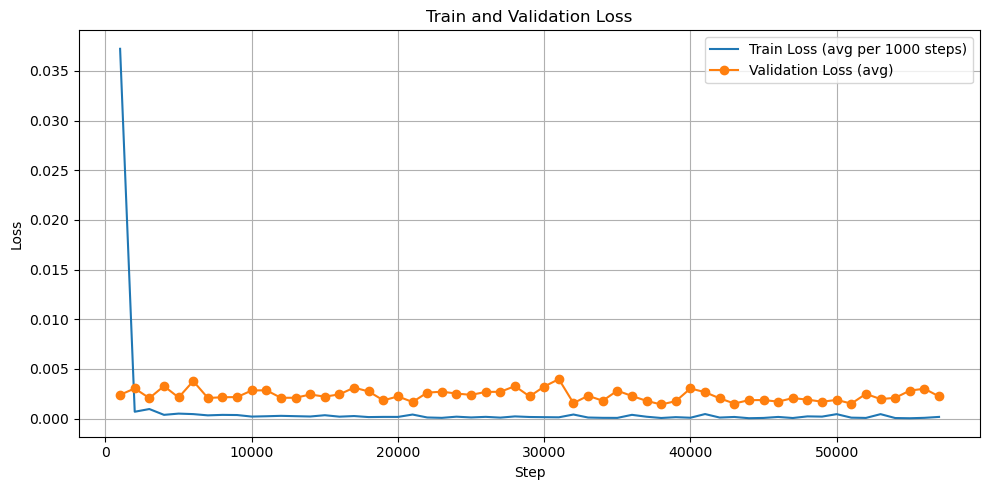

In [18]:
import torch.optim as optim

from tqdm import tqdm
import matplotlib.pyplot as plt

# 初始化模型

model = BERT_CRF(num_labels=6)
# 載入預訓練參數
state_dict = torch.load("models/bert_crf_pretrained_300seed.pth")
# 允許部分 miss（例如你有改一些架構）
model.load_state_dict(state_dict, strict=False)
model = model.to(device)

optimizer = optim.AdamW(model.parameters(), lr=5e-5)

num_epochs = 3
log_interval = 1000
loss_accumulator = 0
global_step = 0
train_losses = []
val_losses = []
val_steps = []

global_step = 0

for epoch in range(num_epochs):
    total_loss = 0

    for batch_idx, batch in enumerate(tqdm(train_loader, desc=f'Epoch {epoch+1}')):
        model.train()

        input_ids, attention_mask, labels  = [x.to(device) for x in batch[:3]]
        sep_none_type = [x.to(device) for x in batch[5]]
        torch.cuda.synchronize() 
        optimizer.zero_grad()
        loss = model(input_ids, attention_mask, labels, sep_none_type)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        loss_accumulator += loss.item()
        global_step += 1

        # print(f"Step {global_step} - Batch Loss: {loss.item():.6f}")

        # === 每 log_interval step 做一次 train/val loss logging ===
        if global_step % log_interval == 0:
            avg_train_loss = loss_accumulator / log_interval
            train_losses.append(avg_train_loss)
            val_steps.append(global_step)
            loss_accumulator = 0  # reset

            # === validation loss ===
            model.eval()
            val_loss_sum = 0
            val_steps_count = 0
            with torch.no_grad():
                for val_batch in val_loader:
                    val_input_ids, val_attention_mask, val_labels = [x.to(device) for x in val_batch[:3]]
                    val_loss = model(val_input_ids, val_attention_mask, val_labels)
                    val_loss_sum += val_loss.item()
                    val_steps_count += 1

            avg_val_loss = val_loss_sum / val_steps_count
            val_losses.append(avg_val_loss)

            print(f"[Step {global_step}] Train Loss: {avg_train_loss:.8f} | Val Loss: {avg_val_loss:.8f}")

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss (sum): {total_loss:.4f}")


plt.figure(figsize=(10, 5))
plt.plot(val_steps, train_losses, label='Train Loss (avg per 1000 steps)')
plt.plot(val_steps, val_losses, label='Validation Loss (avg)', marker='o')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
torch.save(model.state_dict(), "models/bert_crf_pretrained_Mixed_threshold_seed300.pth")

In [20]:
model = BERT_CRF(num_labels=6)
# 載入預訓練參數
state_dict = torch.load("models/bert_crf_pretrained_Mixed_threshold_seed300.pth")
# 允許部分 miss（例如你有改一些架構）
model.load_state_dict(state_dict, strict=False)
model = model.to(device)

In [21]:
from sklearn.metrics import precision_recall_fscore_support

model.eval()
all_true_labels = []
all_pred_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = [x.to(device) for x in batch[:3]]
        word_lists, word_id_lists = batch[3], batch[4]
        # sep_none_type = [x.to(device) for x in batch[5]]
        predictions = model(input_ids, attention_mask)

        for i in range(len(word_lists)):
            word_list = word_lists[i]          # 原始詞 list
            word_ids = word_id_lists[i]        # token 對應的 word index
            preds = predictions[i]
            trues = labels[i]
            tokens = input_ids[i]

            for idx, word_idx in enumerate(word_ids):
                if word_idx is None:
                    continue
                word = word_list[word_idx]
                if word == "[SEP]" and trues[idx].item() != -1:
                    all_true_labels.append(id2label[trues[idx].item()])
                    all_pred_labels.append(id2label[preds[idx]])

print(f"True Labels: {len(all_true_labels)}, Pred Labels: {len(all_pred_labels)}")
print(f"Unique True Labels: {set(all_true_labels)}")
print(f"Unique Pred Labels: {set(all_pred_labels)}")

precision, recall, f1, _ = precision_recall_fscore_support(
    all_true_labels, all_pred_labels, average="macro"
)

print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")


True Labels: 781, Pred Labels: 781
Unique True Labels: {'methods', 'objective', 'background', 'O', 'conclusions', 'results'}
Unique Pred Labels: {'methods', 'background', 'objective', 'conclusions', 'results'}
Test Precision: 0.5941
Test Recall: 0.6907
Test F1 Score: 0.6129


/opt/packages/anaconda3-2024.10-1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
from collections import Counter

conclusion_preds = [
    pred for true, pred in zip(all_true_labels, all_pred_labels)
    if true == "conclusions"
]

pred_counter = Counter(conclusion_preds)
total = sum(pred_counter.values())

for label, count in pred_counter.most_common():
    percent = count / total * 100
    print(f"{label}: {count} ({percent:.2f}%)")


conclusions: 201 (99.50%)
background: 1 (0.50%)


In [23]:
from collections import Counter

conclusion_true = [
    true for true, pred in zip(all_true_labels, all_pred_labels)
    if pred == "conclusions"
]

pred_counter = Counter(conclusion_true)
total = sum(pred_counter.values())

for label, count in pred_counter.most_common():
    percent = count / total * 100
    print(f"{label}: {count} ({percent:.2f}%)")


conclusions: 201 (98.53%)
objective: 1 (0.49%)
background: 1 (0.49%)
O: 1 (0.49%)


In [24]:
from sklearn.metrics import accuracy_score
precision, recall, f1, _ = precision_recall_fscore_support(
    all_true_labels, all_pred_labels, average="weighted"
)

print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

print(f"Test Accuracy: {accuracy_score(all_true_labels, all_pred_labels)}")

Test Precision: 0.8951
Test Recall: 0.8758
Test F1 Score: 0.8762
Test Accuracy: 0.8758002560819462


/opt/packages/anaconda3-2024.10-1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
from sklearn.metrics import classification_report

print(classification_report(all_true_labels, all_pred_labels, digits=4))


              precision    recall  f1-score   support

           O     0.0000    0.0000    0.0000         9
  background     0.9839    0.7753    0.8673       316
 conclusions     0.9853    0.9950    0.9901       202
     methods     0.7243    0.9781    0.8323       137
   objective     0.0909    0.5000    0.1538         2
     results     0.7803    0.8957    0.8340       115

    accuracy                         0.8758       781
   macro avg     0.5941    0.6907    0.6129       781
weighted avg     0.8951    0.8758    0.8762       781



/opt/packages/anaconda3-2024.10-1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/packages/anaconda3-2024.10-1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/packages/anaconda3-2024.10-1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

In [26]:
from sklearn.metrics import accuracy_score
precision, recall, f1, _ = precision_recall_fscore_support(
    all_true_labels, all_pred_labels, average="micro"
)

print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

print(f"Test Accuracy: {accuracy_score(all_true_labels, all_pred_labels)}")

Test Precision: 0.8758
Test Recall: 0.8758
Test F1 Score: 0.8758
Test Accuracy: 0.8758002560819462


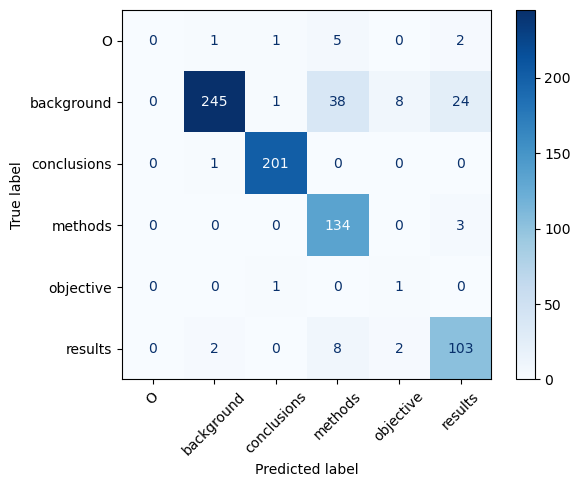

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
labels = sorted(set(all_true_labels) | set(all_pred_labels))  # 統一所有可能的 label

cm = confusion_matrix(all_true_labels, all_pred_labels, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation=45, cmap="Blues")